In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os.path
from pathlib import Path

import json
import pyam
import scmdata
import pandas as pd
import numpy as np
from pymagicc.io import MAGICCData

import utils

## plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
ID = "sb_noSRM_inclu"

<IPython.core.display.Javascript object>

In [4]:
DATA_FILE = Path(utils.DATA_DIR / "plotting_data" / "figure4" / f"{ID}.csv")

<IPython.core.display.Javascript object>

In [6]:
data = pd.read_csv(str(DATA_FILE))

<IPython.core.display.Javascript object>

In [7]:
data["Average annual NNEs"] = pd.cut(
    data["average_cdr_between_net0_and_15"],
    [-20, 1, 5, 15, 25, 45],
    labels=["< 1", "1 - 5", "5 - 15", "15 - 25", "> 25"],
)
data["Max annual NNE by 2500"] = pd.cut(
    data["max_assigned_CDR"],
    [-20, 1, 5, 15, 25, 45],
    labels=["< 1", "1 - 5", "5 - 15", "15 - 25", "> 25"],
)
data["Max deployed annual NNEs"] = pd.cut(
    data["max_deployed_CDR"],
    [-20, 5, 15, 25, 45],
    labels=["<5", "5-15", "15-25", ">25"],
)

<IPython.core.display.Javascript object>

In [8]:
colors = [
    sns.color_palette("Paired")[0],
    sns.color_palette("Paired")[1],
    #  sns.color_palette("Paired")[11],
    sns.color_palette("Paired")[2],
    sns.color_palette("Paired")[3],
    sns.color_palette("Paired")[5],
    #   sns.color_palette("Paired")[9],
]

<IPython.core.display.Javascript object>

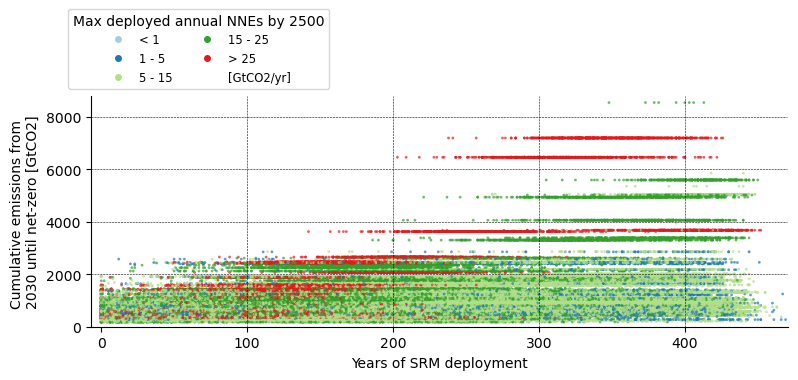

<IPython.core.display.Javascript object>

In [9]:
fig, ax = plt.subplots(figsize=(9, 3))


sns.scatterplot(
    data=data,
    x="SRM_at_first_crossing",
    y="cumulative_pos_emms_at_net0",
    hue="Max annual NNE by 2500",
    palette=colors,
    alpha=0.7,
    s=4,
    ec=None,
)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.spines["left"].set_visible(False)
plt.xlim(-7, 471)
plt.ylim(0, 8800)

ax.vlines(100, 0, 8800, color="black", ls="--", lw=0.4)
ax.vlines(200, 0, 8800, color="black", ls="--", lw=0.4)
ax.vlines(300, 0, 8800, color="black", ls="--", lw=0.4)
ax.vlines(400, 0, 8800, color="black", ls="--", lw=0.4)
# ax.hlines(1000, -7, 470, color="black", ls="--", lw=0.4)
ax.hlines(2000, -7, 470, color="black", ls="--", lw=0.4)
# ax.hlines(3000, -7, 470, color="black", ls="--", lw=0.4)
ax.hlines(4000, -7, 470, color="black", ls="--", lw=0.4)
# ax.hlines(5000, -7, 470, color="black", ls="--", lw=0.4)
ax.hlines(6000, -7, 470, color="black", ls="--", lw=0.4)
# ax.hlines(7000, -7, 470, color="black", ls="--", lw=0.4)
ax.hlines(8000, -7, 470, color="black", ls="--", lw=0.4)


smaller1 = mlines.Line2D(
    [], [], color=colors[0], marker="o", linestyle="None", markersize=4, label="< 1"
)
CDR15 = mlines.Line2D(
    [], [], color=colors[1], marker="o", linestyle="None", markersize=4, label="1 - 5"
)
CDR515 = mlines.Line2D(
    [], [], color=colors[2], marker="o", linestyle="None", markersize=4, label="5 - 15"
)
CDR1525 = mlines.Line2D(
    [], [], color=colors[3], marker="o", linestyle="None", markersize=4, label="15 - 25"
)
larger25 = mlines.Line2D(
    [], [], color=colors[4], marker="o", linestyle="None", markersize=4, label="> 25"
)
unit = mlines.Line2D(
    [],
    [],
    color="white",
    marker="o",
    linestyle="None",
    markersize=4,
    label="[GtCO2/yr]",
)

cur_pol = mlines.Line2D(
    [],
    [],
    color="black",
    marker="o",
    linestyle="None",
    markersize=4,
    label="current 2100 NDC-projections",
)


plt.legend(
    title="Max deployed annual NNEs by 2500",
    fontsize="small",
    bbox_to_anchor=(0.35, 1.4),
    ncol=2,
    handles=[smaller1, CDR15, CDR515, CDR1525, larger25, unit],
)
plt.ylabel("Cumulative emissions from \n2030 until net-zero [GtCO2]")
plt.xlabel("Years of SRM deployment")

plt.savefig(str(Path(utils.PLOTS_DIR / "SI" / f"{ID}_S1.png")), bbox_inches="tight")
# plt.savefig(str(Path(utils.PLOTS_DIR / "figure2" / f"{ID}_part1.png")), bbox_inches="tight")

plt.show()

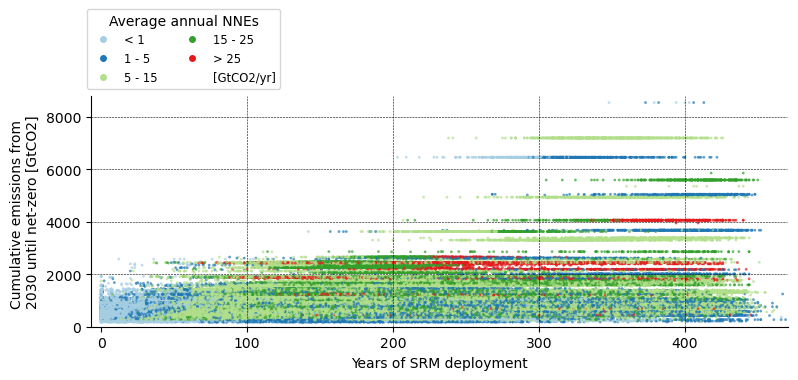

<IPython.core.display.Javascript object>

In [10]:
fig, ax = plt.subplots(figsize=(9, 3))


sns.scatterplot(
    data=data,
    x="SRM_at_first_crossing",
    y="cumulative_pos_emms_at_net0",
    hue="Average annual NNEs",
    palette=colors,
    alpha=0.7,
    s=4,
    ec=None,
)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.spines["left"].set_visible(False)
plt.xlim(-7, 471)
plt.ylim(0, 8800)

ax.vlines(100, 0, 8800, color="black", ls="--", lw=0.4)
ax.vlines(200, 0, 8800, color="black", ls="--", lw=0.4)
ax.vlines(300, 0, 8800, color="black", ls="--", lw=0.4)
ax.vlines(400, 0, 8800, color="black", ls="--", lw=0.4)
# ax.hlines(1000, -7, 470, color="black", ls="--", lw=0.4)
ax.hlines(2000, -7, 470, color="black", ls="--", lw=0.4)
# ax.hlines(3000, -7, 470, color="black", ls="--", lw=0.4)
ax.hlines(4000, -7, 470, color="black", ls="--", lw=0.4)
# ax.hlines(5000, -7, 470, color="black", ls="--", lw=0.4)
ax.hlines(6000, -7, 470, color="black", ls="--", lw=0.4)
# ax.hlines(7000, -7, 470, color="black", ls="--", lw=0.4)
ax.hlines(8000, -7, 470, color="black", ls="--", lw=0.4)


smaller1 = mlines.Line2D(
    [], [], color=colors[0], marker="o", linestyle="None", markersize=4, label="< 1"
)
CDR15 = mlines.Line2D(
    [], [], color=colors[1], marker="o", linestyle="None", markersize=4, label="1 - 5"
)
CDR515 = mlines.Line2D(
    [], [], color=colors[2], marker="o", linestyle="None", markersize=4, label="5 - 15"
)
CDR1525 = mlines.Line2D(
    [], [], color=colors[3], marker="o", linestyle="None", markersize=4, label="15 - 25"
)
larger25 = mlines.Line2D(
    [], [], color=colors[4], marker="o", linestyle="None", markersize=4, label="> 25"
)
unit = mlines.Line2D(
    [],
    [],
    color="white",
    marker="o",
    linestyle="None",
    markersize=4,
    label="[GtCO2/yr]",
)

cur_pol = mlines.Line2D(
    [],
    [],
    color="black",
    marker="o",
    linestyle="None",
    markersize=4,
    label="current 2100 NDC-projections",
)


plt.legend(
    title="Average annual NNEs",
    fontsize="small",
    bbox_to_anchor=(0.28, 1.4),
    ncol=2,
    handles=[smaller1, CDR15, CDR515, CDR1525, larger25, unit],
)
plt.ylabel("Cumulative emissions from \n2030 until net-zero [GtCO2]")
plt.xlabel("Years of SRM deployment")

plt.savefig(
    str(Path(utils.PLOTS_DIR / "figure4" / f"{ID}_4a.png")), bbox_inches="tight"
)

plt.show()